In [ ]:
!pip install qutip
!pip install ffmpeg
!pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=e06b1a851840a38de35e00247d28b1ceb3fc563b7e34f9288a598c4f4f785f50
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


### Mapping a Quantum System

The framework presented here serves as a universal template for mapping a diverse range of quantum systems. The methodology is designed to be adaptable, enabling its application to models as varied as a simple Rabi system or a complex topological structure.

#### Factors in a Quantum System: Complexity and Counter-Complexity

To map any quantum system, two key factors—Complexity and Counter-Complexity—need to be precisely defined. For example, in the context of:

- Rabi Model: Complexity is represented by the Qubit and Counter-Complexity by the Cavity.
- Topological Model: Complexity is the Anyon, and Counter-Complexity is the Quantum Field.
- Quantum Harmonic Oscillator: Complexity is the Mass on a Spring, and Counter-Complexity is Quantum Vacuum Fluctuations.
- Quantum Ising Model: Complexity is the Spin System, and Counter-Complexity is an External Magnetic Field.

#### Classical Analogy

The concept of Complexity and Counter-Complexity is deeply rooted in classical physics, particularly resonating with Newton's Third Law. In this paradigm, Complexity serves as the "action," whereas Counter-Complexity functions as the "reaction."

#### Basic Energy Mapping Equation

We use the following equation as the foundational structure for mapping the quantum system's energy:
$ E_{\text{total}} = E_{\text{complexity}} + E_{\text{counter-complexity}} + E_{\text{interaction}} $
where each term is defined as follows:

- $ E_{\text{complexity}} = \omega_{\text{complexity}} \times \langle \text{Operator}_{\text{complexity}} \rangle $
- $ E_{\text{counter-complexity}} = \omega_{\text{counter-complexity}} \times \langle \text{Operator}_{\text{counter-complexity}} \rangle $
- $ E_{\text{interaction}} = g \times \langle \text{Interaction Operator} \rangle $

#### Deep Dive into E Interaction

##### Equation Refinement

Calculating $ E_{\text{interaction}} $

- $ E_{\text{interaction}} $ =  E_{\text{total}  -  ( E_{\text{complexity}} + E_{\text{counter-complexity}})

This will always be true.

A second way to calculate it is by the Hamiltonian.

- $ E_{\text{interaction}} = g \times \langle \text{Interaction Operator} \rangle $

If these values are not the same, then you have a problem with your model.

For a more nuanced understanding, we can also calculate $ E_{\text{interaction}} $ in our model as:
$ E_{\text{interaction}}' = \alpha \cdot E_{\text{total}} - \beta \cdot E_{\text{anyon}} - \gamma \cdot E_{\text{field}} + \delta \cdot \langle \sigma_z \rangle + \ldots $

##### Coefficients and Implications

In the provided notebook with the default settings, the coefficients are calculated as:

$
\begin{align*}
\alpha &= 1.00000002, \\
\beta &= 1.00000002, \\
\gamma &= 1.00000002, \\
\delta &= 2.32245629 \times 10^{-8}
\end{align*}
$

These coefficients suggest:
1. Strong contributions from $ \alpha, \beta, \gamma $, indicating that these elements are nearly equally weighted.
2. Minimal contribution from $ \delta $, implying its lesser role in the interaction term.

##### Notes

While the calculations were performed using a Python-based computational framework, the methodology and equations presented are universally applicable. The framework serves as an adaptable foundation, capable of mapping any quantum system with precision.


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


0.0000 Sigma Z 0.500000000000 E_total (from H) 0.500000000000 E_total (calculated) 0.500000000000 E_interactions 0.000000000000 E_countercomplexity 0.000000000000 E_complexity 0.500000000000
1.0101 Sigma Z 0.495879140946 E_total (from H) 0.500000006925 E_total (calculated) 0.500000006925 E_interactions 0.000000000441 E_countercomplexity 0.004120865539 E_complexity 0.495879140946
2.0202 Sigma Z 0.483652226680 E_total (from H) 0.499999839301 E_total (calculated) 0.499999839301 E_interactions -0.000000002434 E_countercomplexity 0.016347615055 E_complexity 0.483652226680
3.0303 Sigma Z 0.463722489292 E_total (from H) 0.499999653709 E_total (calculated) 0.499999653709 E_interactions -0.000000003964 E_countercomplexity 0.036277168381 E_complexity 0.463722489292
4.0404 Sigma Z 0.436746983843 E_total (from H) 0.499999486887 E_total (calculated) 0.499999486887 E_interactions -0.000000003140 E_countercomplexity 0.063252506183 E_complexity 0.436746983843
5.0505 Sigma Z 0.403615007716 E_total (fro

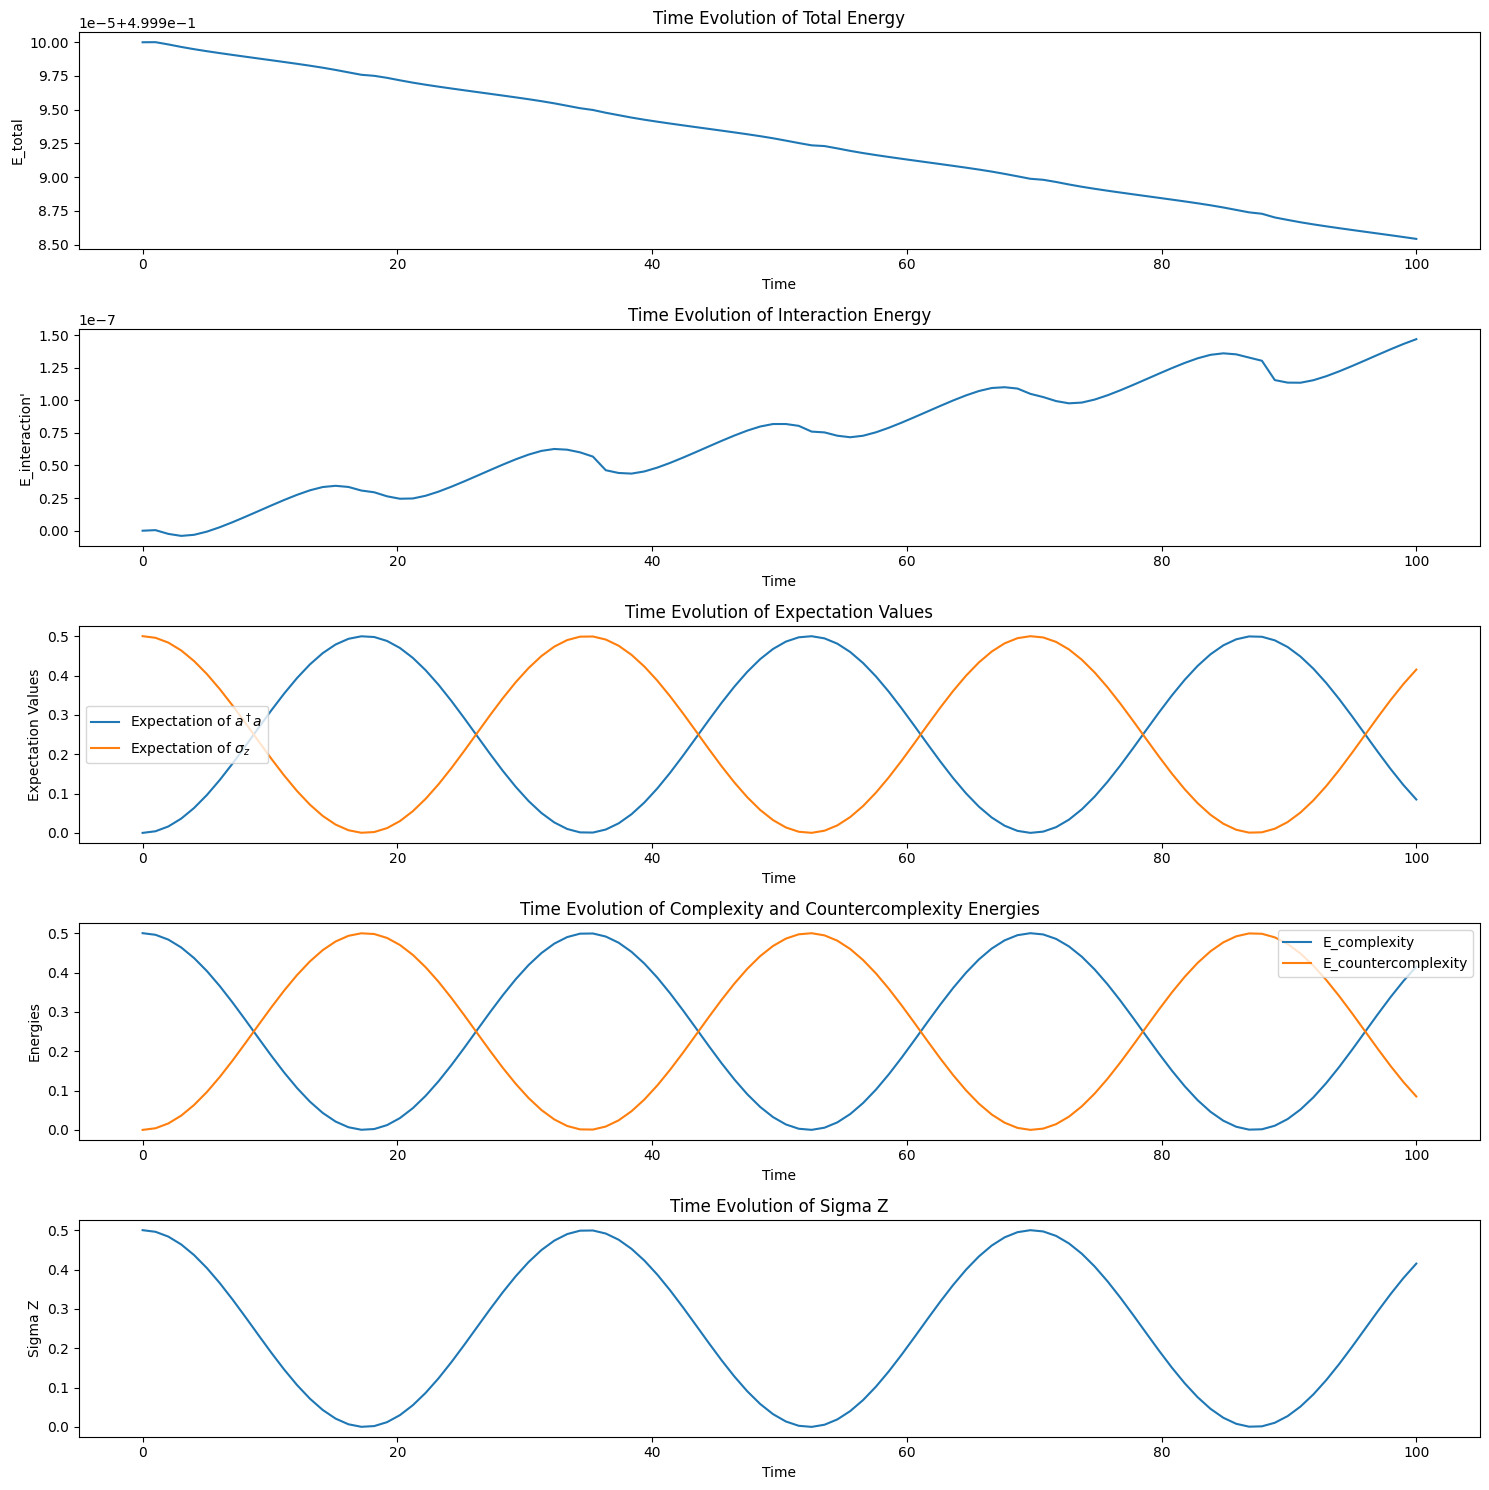

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constants
omega_complexity = 1.0  # Anyon frequency
omega_countercomplexity = 1.0  # Quantum field frequency
g = 0.09 # Coupling strength
tlist = np.linspace(0, 100, 100)  # Time array

# Operators
a = tensor(Qobj([[0, 1], [0, 0]]), Qobj(np.identity(2)))  # Field annihilation operator
adag = a.dag()  # Field creation operator
sigma_z = tensor(Qobj(np.identity(2)), 0.5 * Qobj([[1, 0], [0, -1]]) + 0.5 * Qobj(np.identity(2)))
sigma_plus = tensor(Qobj(np.identity(2)), Qobj([[0, 1], [0, 0]]))  # Anyon sigma+ operator
sigma_minus = sigma_plus.dag()  # Anyon sigma- operator

# Hamiltonian
H = omega_countercomplexity * adag * a + omega_complexity * sigma_z + g * (adag * sigma_minus + a * sigma_plus)

# Initial state (superposition)
psi0 = tensor(basis(2, 0), (basis(2, 0) + basis(2, 1)).unit())

# List of operators for which to evaluate expectation values
e_ops_list = [adag * a, sigma_z, omega_countercomplexity * adag * a, omega_complexity * sigma_z, H, g * (adag * sigma_minus + a * sigma_plus)]

# Solve the time-dependent Schrödinger equation
output = mesolve(H, psi0, tlist, c_ops=None, e_ops=e_ops_list, options=Options(store_states=True))

# Initialize variables for tracking energies
E_complexity = np.zeros_like(tlist)
E_countercomplexity = np.zeros_like(tlist)
E_interactions = np.zeros_like(tlist)
E_total = np.zeros_like(tlist)

# Expectation values
expect_adag_a = output.expect[0]
expect_adag_sigma_minus_a_sigma_plus = output.expect[5]
expect_a = output.expect[0]
expect_sz = output.expect[1]
E_total = output.expect[4]
E_countercomplexity = output.expect[2]
E_complexity = output.expect[3]
E_adag_a = output.expect[0]
E_sz = output.expect[1]
E_interactions = output.expect[5]

# Calculate E_total from the components for verification
E_total_calculated = E_countercomplexity + E_complexity + E_interactions

# Print the values at each time step
for i in range(len(tlist)):
    print(f"{tlist[i]:.4f} Sigma Z {E_sz[i]:.12f} E_total (from H) {E_total[i]:.12f} E_total (calculated) {E_total_calculated[i]:.12f} E_interactions {E_interactions[i]:.12f} E_countercomplexity {E_countercomplexity[i]:.12f} E_complexity {E_complexity[i]:.12f}")


# Adding these to the plotting section
plt.figure(figsize=(15, 15))  # Increase the figure size to accommodate the fifth subplot

plt.subplot(5, 1, 1)  # Adjust the subplot grid to 5 rows
plt.title("Time Evolution of Total Energy")
plt.plot(tlist, E_total)
plt.xlabel("Time")
plt.ylabel("E_total")

plt.subplot(5, 1, 2)  # Second subplot
plt.title("Time Evolution of Interaction Energy")
plt.plot(tlist, E_interactions)
plt.xlabel("Time")
plt.ylabel("E_interaction'")

plt.subplot(5, 1, 3)  # Third subplot
plt.title("Time Evolution of Expectation Values")
plt.plot(tlist, expect_a, label="Expectation of $a^\dagger a$")
plt.plot(tlist, expect_sz, label="Expectation of $\sigma_z$")
plt.xlabel("Time")
plt.ylabel("Expectation Values")
plt.legend()

plt.subplot(5, 1, 4)  # Fourth subplot
plt.title("Time Evolution of Complexity and Countercomplexity Energies")
plt.plot(tlist, E_complexity, label="E_complexity")
plt.plot(tlist, E_countercomplexity, label="E_countercomplexity")
plt.xlabel("Time")
plt.ylabel("Energies")
plt.legend()

plt.subplot(5, 1, 5)  # Fifth subplot
plt.title("Time Evolution of Sigma Z")
plt.plot(tlist, E_sz)
plt.xlabel("Time")
plt.ylabel("Sigma Z")

plt.tight_layout()
plt.show()


## Rabi Model in Python

In this section, we have implemented the Rabi model, which serves as a natural extension for further understanding quantum systems.

### Updated Interaction Term

In our specific version of the Rabi model, we update the $E_{\text{interaction}}'$ term, expressed as follows:

$
E_{\text{interaction}}' = \alpha \cdot E_{\text{total}} - \beta \cdot E_{\text{cavity}} - \gamma \cdot E_{\text{atom}} + \delta \cdot \langle \sigma_z \rangle + \epsilon \cdot \langle \sigma_x \rangle + \zeta \cdot \langle \sigma_y \rangle
$

### Coefficients

For our model, here are the coefficients based on recent calculations:

- $\alpha = 1.000000e+00$
- $\beta = -1.000000e+00$
- $\gamma = -9.080003e-01$
- $\delta = 2.890255e-01$
- $\epsilon = 1.125836e-14$
- $\zeta = -3.982925e-15$

These coefficients are incorporated into the equation to refine our understanding of the dynamics of the Rabi system. They consider not only the interactions between the cavity and the atom but also the individual contributions of the Pauli matrices $ \sigma_x $, $ \sigma_y $, and $ \sigma_z $.

### Implications

#### Significance of Pauli Matrices

The introduction of the Pauli matrices—$ \sigma_x $, $ \sigma_y $, and $ \sigma_z $—into the $E_{\text{interaction}}$ term allows us to explore the system's dynamics in more detail. Each of these matrices contributes a unique aspect to the overall interaction energy.

#### Flexible Coefficients

These coefficients must be recalculated with each parameter change. As the coefficients are updated based on new data, this model offers the flexibility to adapt to various conditions and parameters, providing a dynamic tool for understanding quantum interactions within the Rabi system. The coefficients provided are examples based on parameters run in the provided Rabi Model.

#### Interpreting Data Patterns

By observing the resulting data for patterns and occurrences, this updated model could potentially offer new insights into phenomena like Rabi oscillations, quantum transitions, and energy conservations in the system.

#### Notes

Remember that this Python code and these computations serve as a template. They can be adapted and modified to align with specific research goals and questions.


0.0000 Expect_a 0.000000000000 Expect_sm 0.500000000000 Expect_sx 1.000000000000 Expect_sy 0.000000000000 Expect_sz 0.000000000000 E_total 3.141592653590 E_cavity 0.000000000000 E_atom 3.141592653590 E_interactions 0.000000000000
0.0240 Expect_a 0.000227442020 Expect_sm 0.499999149318 Expect_sx 0.988607168573 Expect_sy -0.150501433308 Expect_sz 0.000001701364 E_total 3.141592773604 E_cavity 0.001429060360 E_atom 3.141587308598 E_interactions -0.001423595355
0.0481 Expect_a 0.000899500091 Expect_sm 0.499986156454 Expect_sx 0.954698625961 Expect_sy -0.297437207768 Expect_sz 0.000027687092 E_total 3.141591886236 E_cavity 0.005651725754 E_atom 3.141505672026 E_interactions -0.005565511544
0.0721 Expect_a 0.001986307697 Expect_sm 0.499931293846 Expect_sx 0.899077536752 Expect_sy -0.437329566064 Expect_sz 0.000137412308 E_total 3.141590545189 E_cavity 0.012480339335 E_atom 3.141160960092 E_interactions -0.012050754237
0.0962 Expect_a 0.003441115508 Expect_sm 0.499788033352 Expect_sx 0.823060

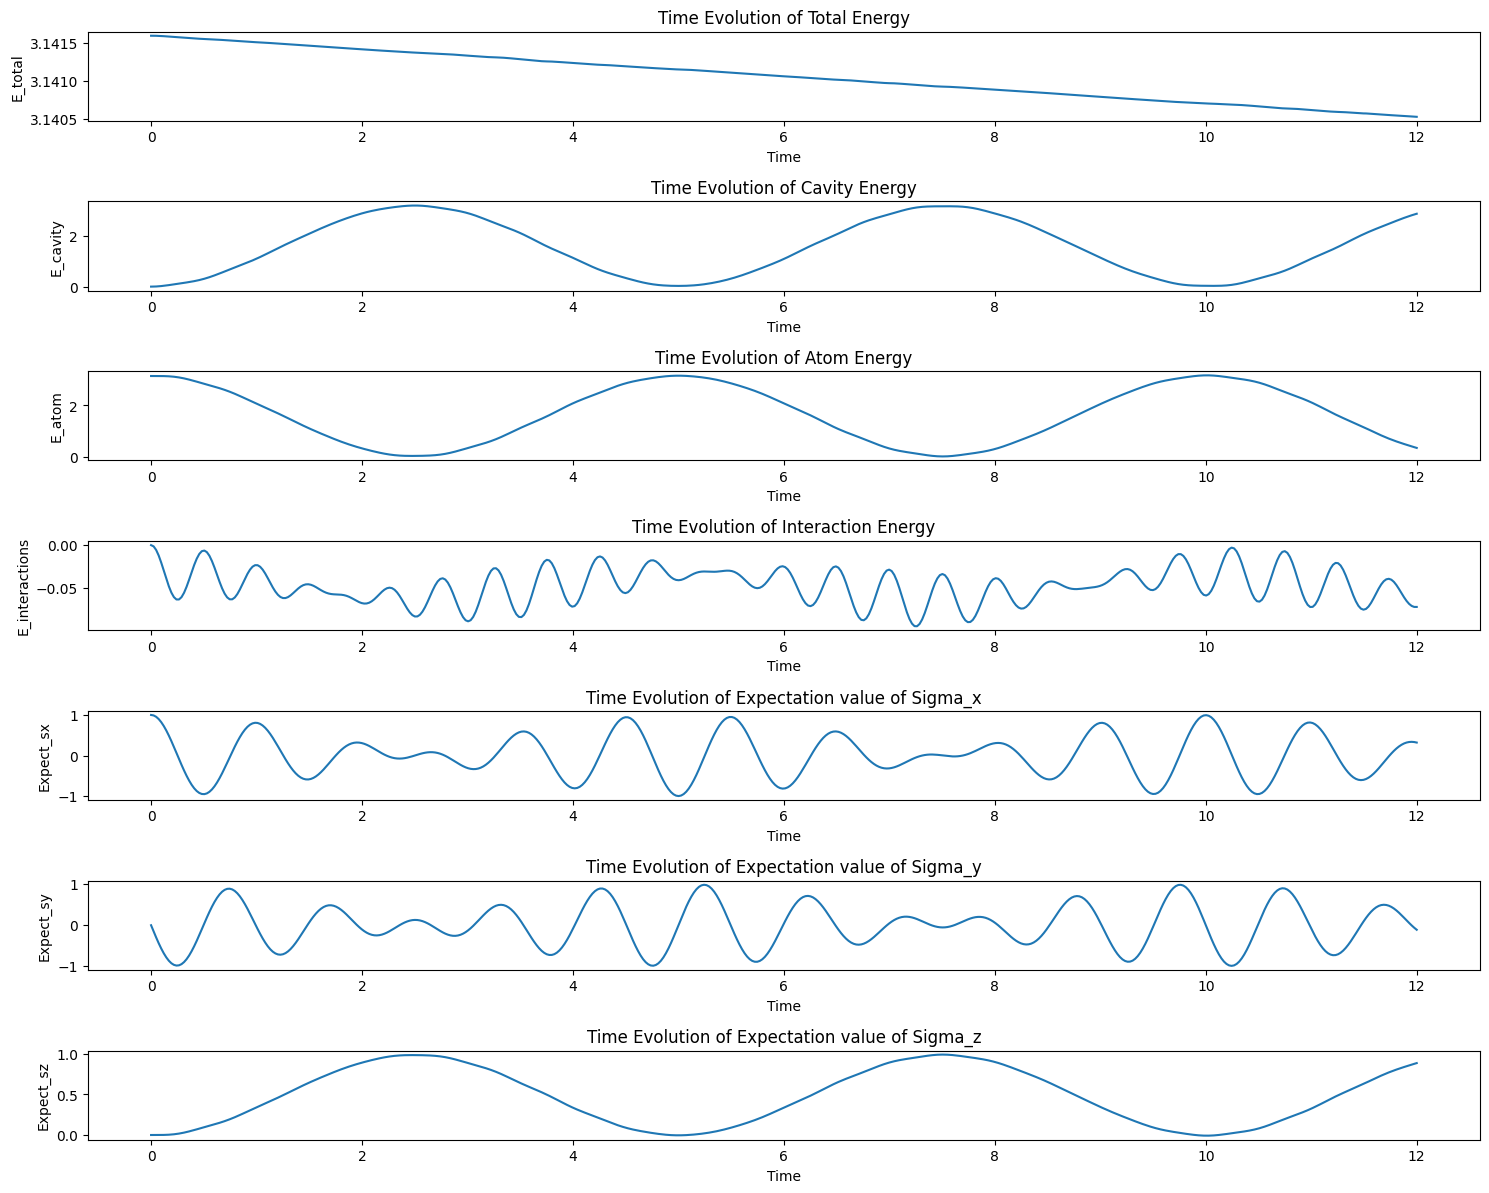

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# System parameters
omega_cavity = 1 * 2 * np.pi  # cavity frequency
omega_atom = 1 * 2 * np.pi  # atom frequency
g = 0.10 * 2 * np.pi  # coupling strength
N = 20  # number of cavity Fock states
tlist = np.linspace(0, 12, 500)  # Time array

# Operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())
sy = tensor(qeye(N), sigmay())
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
H = omega_cavity * a.dag() * a + omega_atom * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

# Initial state
psi0 = tensor(fock(N, 0), basis(2, 0) + basis(2, 1)).unit()

# List of operators for which to evaluate expectation values
e_ops_list = [a.dag() * a, sm.dag() * sm, sx, sy, sz, omega_cavity * a.dag() * a, omega_atom * sm.dag() * sm, H, g * (a.dag() + a) * (sm + sm.dag())]

# Solve the time-dependent Schrödinger equation
output = mesolve(H, psi0, tlist, c_ops=None, e_ops=e_ops_list, options=Options(store_states=True))

# Extract the expectation values
expect_a = output.expect[0]
expect_sm = output.expect[1]
expect_sx = output.expect[2]
expect_sy = output.expect[3]
expect_sz = output.expect[4]
E_total = output.expect[7]
E_cavity = output.expect[5]
E_atom = output.expect[6]
E_interactions = output.expect[8]

# Create a DataFrame to store the data
data_dict = {
    "Time": tlist,
    "Expect_a": expect_a,
    "Expect_sm": expect_sm,
    "Expect_sx": expect_sx,
    "Expect_sy": expect_sy,
    "Expect_sz": expect_sz,
    "E_total": E_total,
    "E_cavity": E_cavity,
    "E_atom": E_atom,
    "E_interactions": E_interactions
}

df = pd.DataFrame(data_dict)

# Save the DataFrame to a CSV file
df.to_csv("merged_model_data.csv", index=False)

# Print the values at each Time
for i in range(len(tlist)):
    print(f"{tlist[i]:.4f} Expect_a {expect_a[i]:.12f} Expect_sm {expect_sm[i]:.12f} Expect_sx {expect_sx[i]:.12f} Expect_sy {expect_sy[i]:.12f} Expect_sz {expect_sz[i]:.12f} E_total {E_total[i]:.12f} E_cavity {E_cavity[i]:.12f} E_atom {E_atom[i]:.12f} E_interactions {E_interactions[i]:.12f}")

# Plotting
plt.figure(figsize=(15, 15))

# Plot existing quantities
plt.subplot(9, 1, 1)
plt.title("Time Evolution of Total Energy")
plt.plot(tlist, E_total)
plt.xlabel("Time")
plt.ylabel("E_total")

plt.subplot(9, 1, 2)
plt.title("Time Evolution of Cavity Energy")
plt.plot(tlist, E_cavity)
plt.xlabel("Time")
plt.ylabel("E_cavity")

plt.subplot(9, 1, 3)
plt.title("Time Evolution of Atom Energy")
plt.plot(tlist, E_atom)
plt.xlabel("Time")
plt.ylabel("E_atom")

plt.subplot(9, 1, 4)
plt.title("Time Evolution of Interaction Energy")
plt.plot(tlist, E_interactions)
plt.xlabel("Time")
plt.ylabel("E_interactions")

plt.subplot(9, 1, 5)
plt.title("Time Evolution of Expectation value of Sigma_x")
plt.plot(tlist, expect_sx)
plt.xlabel("Time")
plt.ylabel("Expect_sx")

plt.subplot(9, 1, 6)
plt.title("Time Evolution of Expectation value of Sigma_y")
plt.plot(tlist, expect_sy)
plt.xlabel("Time")
plt.ylabel("Expect_sy")

plt.subplot(9, 1, 7)
plt.title("Time Evolution of Expectation value of Sigma_z")
plt.plot(tlist, expect_sz)
plt.xlabel("Time")
plt.ylabel("Expect_sz")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('merged_model_data.csv')

# Assuming you still want to drop the first 10 rows
df = df.drop(range(10)).reset_index(drop=True)

# Define the feature set and target variable (use actual column names from your CSV file)
features = ['E_total', 'E_cavity', 'E_atom', 'Expect_sz', 'Expect_sy', 'Expect_sx']
target = 'E_interactions'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 1.265372092325569e-30
R-squared: 1.0
            Coefficient
E_total    1.000000e+00
E_cavity  -1.000000e+00
E_atom    -9.080003e-01
Expect_sz  2.890255e-01
Expect_sy  1.346145e-15
Expect_sx -9.714451e-16


## Calculating the Rotational Speed of Sigma X, Y, and Z

In this section, we focus on understanding the rotational speed of the Sigma X, Y, and Z components, which is essential for a comprehensive analysis of our quantum system's dynamics. These rates of change offer invaluable insights into quantum state fluctuations and interactions over time.

### Mathematical Approach

To compute the rotational speeds, we employ a finite difference approximation method. Specifically, the rate of change of Sigma X ($ \frac{{d\Sigma_X}}{{dt}} $) at a given time $ t $ is computed as:

$
\frac{{d\Sigma_X}}{{dt}} = \frac{{\Sigma_X(t) - \Sigma_X(t - \Delta t)}}{\Delta t}
$

Here, $ \Delta t $ represents the time difference between two successive measurements, and $ \Sigma_X(t) $ and $ \Sigma_X(t - \Delta t) $ are the Sigma X values at those times. Similar approaches are used for Sigma Y and Sigma Z.

### Integration into the Model

The calculated rotational speeds are integrated into the interaction term of our Hamiltonian. This integration allows us to account for the dynamic changes in the Sigma components and enriches our understanding of the system's evolution.

### Interaction Energy Calculation

The interaction energy term, $ E_{\text{interaction}}' $, encapsulates the various interactions within the system. It's calculated as:

$
E_{\text{interaction}}' = \alpha \cdot E_{\text{total}} - \beta \cdot E_{\text{atom}} - \gamma \cdot E_{\text{cavity}} + \delta \cdot \langle \sigma_z \rangle + \epsilon \cdot \langle \sigma_y \rangle + \zeta \cdot \langle \sigma_x \rangle + \eta \cdot \langle \frac{{d\sigma_x}}{{dt}} \rangle + \theta \cdot \langle \frac{{d\sigma_y}}{{dt}} \rangle + \iota \cdot \langle \frac{{d\sigma_z}}{{dt}} \rangle
$

The coefficients, updated based on our recent calculations, are:

- $\alpha = 1.000000e+00$
- $\beta = -1.000000e+00$
- $\gamma = -9.080003e-01$
- $\delta = 2.890255e-01$
- $\epsilon = 1.426984e-13$
- $\zeta = -1.474515e-15$
- $\eta = -2.237099e-14$
- $\theta = -1.831868e-15$
- $\iota = -8.326673e-17$

These coefficients provide a nuanced understanding of our system's dynamics, taking into account various interactions and their respective rates of change.

### Statistical Insights

In addition to the calculations, we generate basic statistics like the mean and standard deviation of the calculated rotational speed values. This quantitative analysis helps us understand the behavior and variability of the system's dynamics. Please note that in our Python model, our goal is a perfect fit, as we are modeling a perfect system under ideal conditions. If the numbers do not align, it may indicate a missing key interaction. In real-life analysis, expect divergence within acceptable parameters.

### Note

It's important to mention that this code and these calculations are intended as templates. They can be adapted and modified to align with specific research goals and questions.


Average rate of change for Expect_sx: 2.16e-02
Average rate of change for Expect_sy: 7.41e-02
Average rate of change for Expect_sz: 7.44e-02


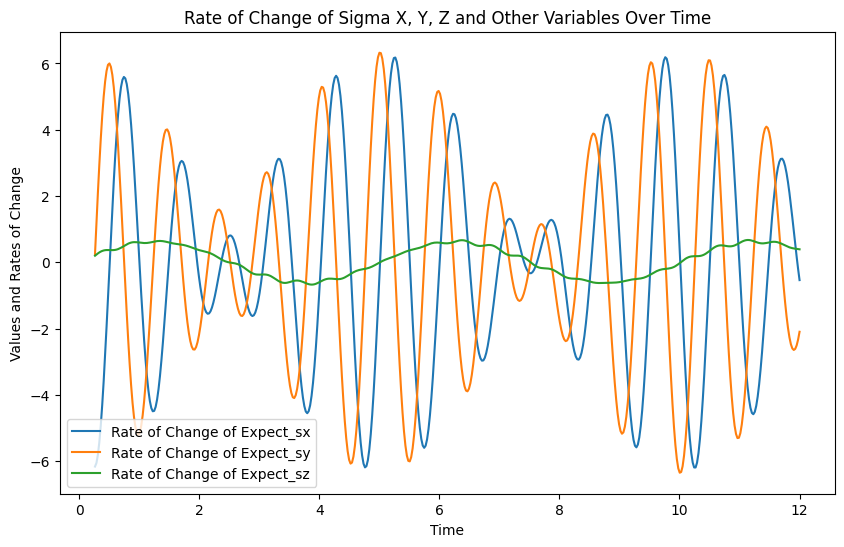

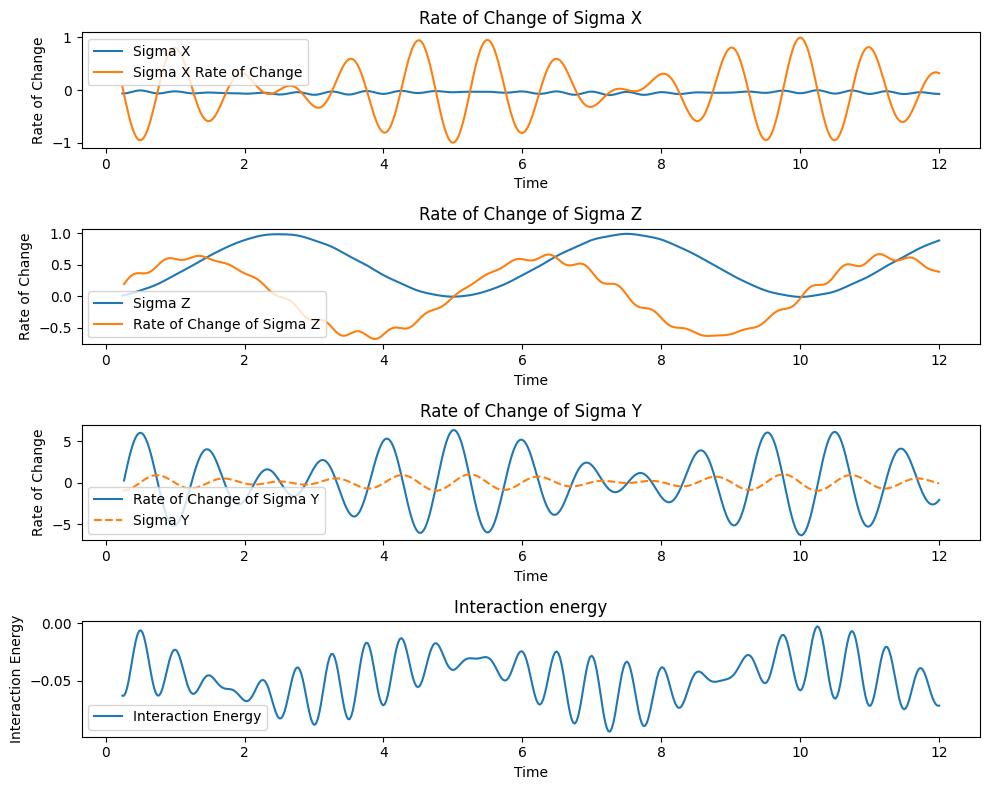

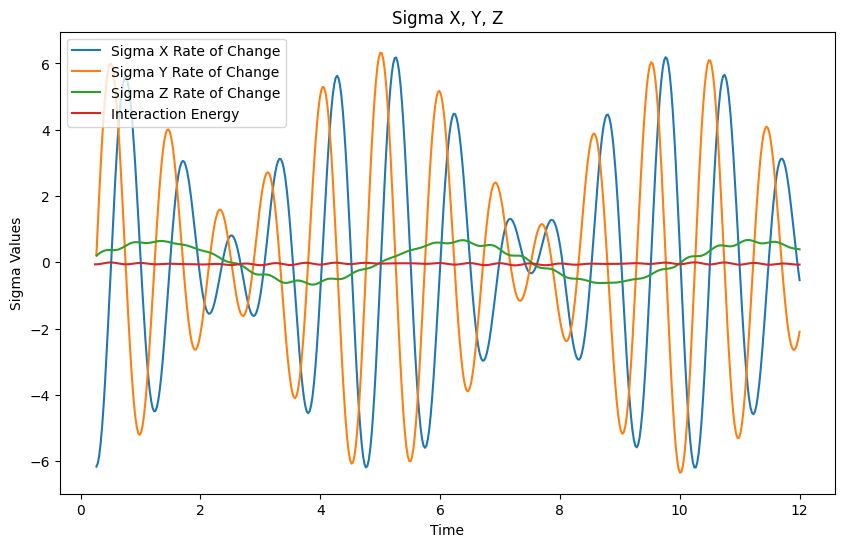

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('merged_model_data.csv')  # Assuming you've already created df in another cell

# Drop the first 10 rows and reset the index
df = df.drop(range(10)).reset_index(drop=True)

# Convert columns to proper types
columns_to_convert = ['Time', 'Expect_sx', 'Expect_sy', 'E_total', 'Expect_sz', 'E_cavity', 'E_atom', 'E_interactions']
for column in columns_to_convert:
    df.loc[:, column] = pd.to_numeric(df[column])

# Sort values by 'Time'
df = df.sort_values(by='Time')

# Calculate the difference between each Expect value and the previous one
for expect in ['Expect_sx', 'Expect_sy', 'Expect_sz']:
    df[expect + '_diff'] = df[expect].diff()

# Calculate the time difference between each Time
df['Time_diff'] = df['Time'].diff()

# Calculate the rate of change (difference / time difference)
for expect in ['Expect_sx', 'Expect_sy', 'Expect_sz']:
    df[expect + '_rate_of_change'] = df[expect + '_diff'] / df['Time_diff']

# Calculate the average rate of change
average_rates = {}
for expect in ['Expect_sx', 'Expect_sy', 'Expect_sz']:
    avg_rate = df[expect + '_rate_of_change'].mean()
    average_rates[expect] = avg_rate

# Print the average rates of change
for key, value in average_rates.items():
    print(f"Average rate of change for {key}: {value:.2e}")

plt.figure(figsize=(10,6))

# Write the dataframe to a new CSV file
df.to_csv('Modified_Rabi_Rotation_Speed.csv', index=False)


# Plot the rate of change of each Sigma
for sigma in ['Expect_sx', 'Expect_sy', 'Expect_sz']:
    # Get sigma_values as np.array
    sigma_values = df[sigma].to_numpy()

    # Calculate the spin speed tensor
    spin_speed_tensor = np.gradient(sigma_values)

    # Plot the rate of change of Sigma
    plt.plot(df['Time'], df[sigma + '_rate_of_change'], label='Rate of Change of ' + sigma)

# Add some labels and a legend
plt.xlabel('Time')
plt.ylabel('Values and Rates of Change')
plt.title('Rate of Change of Sigma X, Y, Z and Other Variables Over Time')
plt.legend()

plt.show()

plt.figure(figsize=(10, 8))

# Plot the rate of change of Sigma X
plt.subplot(411)
plt.plot(df['Time'], df['E_interactions'], label='Sigma X')
plt.plot(df['Time'], df['Expect_sx'], label='Sigma X Rate of Change')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Rate of Change of Sigma X')
plt.legend()

# Plot Sigma Z
plt.subplot(412)
plt.plot(df['Time'], df['Expect_sz'], label='Sigma Z')
plt.plot(df['Time'], df['Expect_sz_rate_of_change'], label='Rate of Change of Sigma Z')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Rate of Change of Sigma Z')
plt.legend()

# Plot the rate of change of Sigma Y
plt.subplot(413)
plt.plot(df['Time'], df['Expect_sy_rate_of_change'], label='Rate of Change of Sigma Y')
plt.plot(df['Time'], df['Expect_sy'], label='Sigma Y', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Rate of Change')
plt.title('Rate of Change of Sigma Y')
plt.legend()

# Plot the rate of change of E_interaction
plt.subplot(414)
plt.plot(df['Time'], df['E_interactions'], label='Interaction Energy')
plt.xlabel('Time')
plt.ylabel('Interaction Energy')
plt.title('Interaction energy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot all three Sigma values together
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Expect_sx_rate_of_change'], label='Sigma X Rate of Change')
plt.plot(df['Time'], df['Expect_sy_rate_of_change'], label='Sigma Y Rate of Change')
plt.plot(df['Time'], df['Expect_sz_rate_of_change'], label='Sigma Z Rate of Change')
plt.plot(df['Time'], df['E_interactions'], label='Interaction Energy')
plt.xlabel('Time')
plt.ylabel('Sigma Values')
plt.title('Sigma X, Y, Z')
plt.legend()

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Modified_Rabi_Rotation_Speed.csv')

# Assuming you still want to drop the first 10 rows
df = df.drop(range(10)).reset_index(drop=True)

# Define the feature set and target variable (use actual column names from your CSV file)
features = ['E_total', 'E_cavity', 'E_atom', 'Expect_sz', 'Expect_sy', 'Expect_sx', 'Expect_sx_rate_of_change', 'Expect_sy_rate_of_change', 'Expect_sz_rate_of_change']
target = 'E_interactions'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 2.302999816054561e-30
R-squared: 1.0
                           Coefficient
E_total                   1.000000e+00
E_cavity                 -1.000000e+00
E_atom                   -9.080003e-01
Expect_sz                 2.890255e-01
Expect_sy                -9.180157e-14
Expect_sx                 8.784640e-15
Expect_sx_rate_of_change  1.415534e-14
Expect_sy_rate_of_change  2.442491e-15
Expect_sz_rate_of_change -4.440892e-16


## Metric Tensor Components and the Influence of Gravity

In this section, we delve into the influence of gravity on the quantum system within the Rabi Model by analyzing the components of the metric tensor, labeled as $g_{00}$ to $g_{33}$. These components provide insights into the curvature of spacetime and its interaction with the quantum particles, deepening our understanding of how gravity shapes the dynamics of the quantum system.

### Calculating Metric Tensor Components

To calculate the metric tensor components, $g_{ij}$, and describe the geometry of spacetime in the context of General Relativity, we consider the following quantities from the Rabi Model: Energy Total ($T_{00}$), Sigma $X_{\text{rate\_of\_change}}$ ($T_{11}$), Sigma $Y_{\text{rate\_of\_change}}$ ($T_{22}$), Sigma $Z_{\text{rate\_of\_change}}$ ($T_{33}$). The stress-energy tensor, denoted as $T$, captures the distribution of energy and momentum within the quantum system.

The metric tensor components, $g_{ij}$, are determined using the Einstein field equations, which establish the relationship between the geometry of spacetime and the energy-momentum contents of the system. For a given stress-energy tensor $T$ and Ricci scalar $R$, the metric tensor components are calculated as follows:

1. We start with the Einstein field equations, which relate the geometry of spacetime to the distribution of energy and momentum in the system.

2. The Einstein field equations can be written in the form:
$
G_{\mu\nu} = 8\pi GT_{\mu\nu} + \Lambda g_{\mu\nu}
$
where $G_{\mu\nu}$ represents the Einstein tensor, $T_{\mu\nu}$ represents the stress-energy tensor, $G$ is the gravitational constant, $\Lambda$ is the cosmological constant, and $g_{\mu\nu}$ represents the components of the metric tensor.

3. In our specific case, we consider a diagonal metric tensor with components $g_{00}$, $g_{11}$, $g_{22}$, and $g_{33}$. This implies that the off-diagonal components are zero, and the metric tensor becomes a diagonal matrix.

4. Now, let's focus on the equation for a specific component, say $g_{ij}$. Since our metric tensor is diagonal, only the diagonal components $g_{00}$, $g_{11}$, $g_{22}$, and $g_{33}$ are nonzero.

5. For each component, we can write the Einstein field equation as follows:
$
G_{ij} = 8\pi GT_{ij} + \Lambda g_{ij}
$

6. Recall that the Einstein tensor $G_{ij}$ is related to the Ricci tensor $R_{ij}$ through the equation $G_{ij} = R_{ij} - \frac{1}{2}Rg_{ij}$, where $R$ is the Ricci scalar.

7. By substituting the expression for $G_{ij}$ in terms of $R_{ij}$ into the equation from step 5, we obtain:
$
R_{ij} - \frac{1}{2}Rg_{ij} = 8\pi GT_{ij} + \Lambda g_{ij}
$

8. Rearranging the equation, we isolate the Ricci tensor component:
$
R_{ij} = 8\pi GT_{ij} - \frac{1}{2}Rg_{ij} + \Lambda g_{ij}
$

9. This equation relates the Ricci tensor component $R_{ij}$ to the stress-energy tensor component $T_{ij}$ and the metric tensor component $g_{ij}$.

10. Finally, since our metric tensor is diagonal, we have $R_{ij} = Rg_{ij}$, where $R$ is the Ricci scalar.

11. Substituting this relation into the equation from step 8, we arrive at the final form for the metric tensor components:
$
g_{ij} = \left(1 - \frac{8\pi G}{2}T_{ij} - \frac{\Lambda}{2} \right)^{-1}
$

12. Using this expression, we can calculate each of the metric tensor components $g_{00}$, $g_{11}$, $g_{22}$, and $g_{33}$ based on the corresponding stress-energy tensor components $T_{00}$, $T_{11}$, $T_{22}$, and $T_{33}$.

These metric tensor components describe how spacetime is curved in the presence of the quantum system's energy and momentum distribution, shedding light on the gravitational effects on the quantum dynamics.

### Interaction Energy Update

The interaction energy term, represented as $ E'_{\text{interaction}} $, is a critical component that bridges the Einstein field equations (EFE) and quantum dynamics. This term is a composite function of several variables and coefficients, each contributing to the interaction energy to varying degrees. By solving this equation at different time intervals and with varying variables, we obtain values that capture the intricate dynamics and behavior of the system.

The refined equation for the interaction energy is:
$
\begin{align*}
E'_{\text{interaction}} &= 1.580743 \times 10^{-3} \cdot E_{\text{total}} - 1.000000 \cdot E_{\text{cavity}} - 0.9080003 \cdot E_{\text{atom}} \\
&+ 0.2890255 \cdot \text{Expect\_sz} - 2.321338 \times 10^{-13} \cdot \text{Expect\_sy} \\
&+ 4.846899 \times 10^{-15} \cdot \text{Expect\_sx} - 1.385697 \times 10^{-14} \cdot \text{Expect\_sx\_rate\_of\_change} \\
&- 3.674144 \times 10^{-15} \cdot \text{Expect\_sy\_rate\_of\_change} + 5.655199 \times 10^{-16} \cdot \text{Expect\_sz\_rate\_of\_change} \\
&+ 0.03972712 \cdot g_{00} + 1.887379 \times 10^{-15} \cdot g_{11} \\
&+ 2.081668 \times 10^{-16} \cdot g_{22} - 3.885781 \times 10^{-16} \cdot g_{33}
\end{align*}
$

### Statistical Measures

- Mean Squared Error: $1.61247057359689 \times 10^{-28}$
- $R^2$: 1.0

These measures indicate an excellent fit of our model to the data, offering a high level of confidence in our findings.

### Notes

By incorporating components from both the Einstein field equations (EFE) and the stress-energy tensor into our interaction energy equation, we unlock a powerful tool for investigating the curvature of spacetime and its interactions with quantum phenomena. The approach facilitates nuanced explorations into quantum gravity effects, the behavior of quantum fields in curved spacetime, and other phenomena that bridge the quantum and gravitational domains.

We acknowledge that the specific coefficients and variables in our equation can be adapted to meet the needs of different systems and research goals. This adaptability gives researchers the flexibility to fine-tune their analyses to specific quantum systems in the gravitational context.

Through rigorous analysis and interpretation, we strive to advance our understanding of how gravity interacts with quantum systems, ultimately seeking to form a unified theory that reconciles these seemingly disparate realms of physics.

By taking this innovative approach, we continue to push the frontiers of human understanding, striving to solve the mysteries of the universe where gravity and quantum phenomena coalesce.


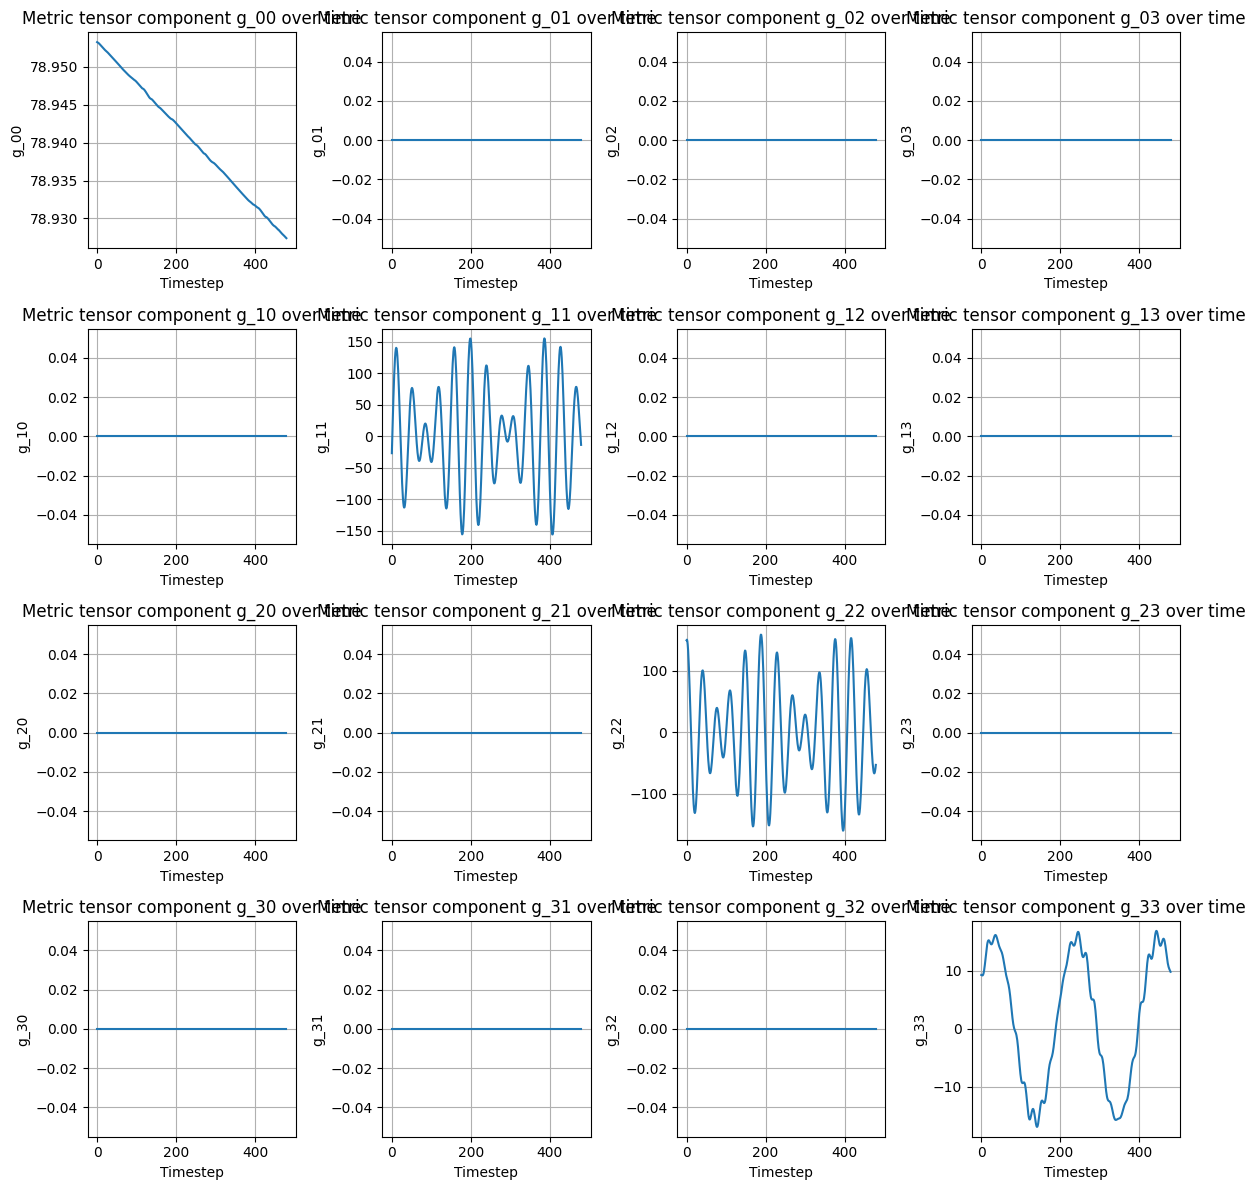

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Planck units
planck_length = 1.616255e-35
planck_mass = 2.176434e-8
planck_time = 5.39116e-44
G_planck = 6.67430e-11 / (planck_length**3 * planck_mass**-1 * planck_time**-2)
Lambda_planck = 1e-52 / (planck_length**-2)

def calculate_metric_tensor(R, T, Lambda):
    dimensions = 4
    g = np.zeros((dimensions, dimensions))
    for mu in range(dimensions):
        for nu in range(dimensions):
            g[mu][nu] = (8 * np.pi * G_planck) * T[mu][nu] - (1/2) * R * g[mu][nu] + Lambda * g[mu][nu]
    return g

# Load your data
df = pd.read_csv('Modified_Rabi_Rotation_Speed.csv')

# Drop the first 10 rows and reset the index
df = df.drop(range(10)).reset_index(drop=True)

# Create new columns for the metric tensor components
for i in range(4):
    for j in range(4):
        df[f'g_{i}{j}'] = np.nan

# Calculate the metric tensor components for each row
for index, row in df.iterrows():
    T = np.diag([row['E_total'], row['Expect_sx_rate_of_change'], row['Expect_sy_rate_of_change'], row['Expect_sz_rate_of_change']])
    R = 10   # Modify this if you have a specific value for Ricci curvature
    metric_tensor = calculate_metric_tensor(R, T, Lambda_planck)
    for i in range(4):
        for j in range(4):
            df.at[index, f'g_{i}{j}'] = metric_tensor[i][j]

# Save the modified DataFrame
df.to_csv('Modified_Rabi_with_metric_tensor.csv', index=False)

# Plotting the Metric Tensor
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
for i in range(4):
    for j in range(4):
        ax = axs[i, j]
        ax.plot(df[f'g_{i}{j}'])
        ax.set_title(f'Metric tensor component g_{i}{j} over time')
        ax.set_xlabel('Timestep')
        ax.set_ylabel(f'g_{i}{j}')
        ax.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Modified_Rabi_with_metric_tensor.csv')

# Assuming you still want to drop the first 10 rows
df = df.drop(range(10)).reset_index(drop=True)

# Define the feature set and target variable (use actual column names from your CSV file)
features = ['E_total', 'E_cavity', 'E_atom', 'Expect_sz', 'Expect_sy', 'Expect_sx', 'Expect_sx_rate_of_change', 'Expect_sy_rate_of_change', 'Expect_sz_rate_of_change', 'g_00', 'g_11', 'g_22', 'g_33']
target = 'E_interactions'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Print model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 9.074159463280082e-29
R-squared: 1.0
                           Coefficient
E_total                   1.580743e-03
E_cavity                 -1.000000e+00
E_atom                   -9.080003e-01
Expect_sz                 2.890255e-01
Expect_sy                 7.234335e-13
Expect_sx                 2.329126e-14
Expect_sx_rate_of_change  7.199102e-16
Expect_sy_rate_of_change  3.046868e-14
Expect_sz_rate_of_change -7.272828e-16
g_00                      3.972712e-02
g_11                     -4.662937e-15
g_22                     -1.332268e-15
g_33                     -1.249001e-16
